In [1]:
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [11]:
file_ext = 'pdf'

In [3]:
res = pd.read_csv(filepath_or_buffer= os.getcwd() + "/results_combined.csv", header=0, sep=',')
test_res = pd.read_csv(filepath_or_buffer= os.getcwd() + "/testing_results.csv", header=None, sep=',', names=['Channel', 'Error']).to_numpy()

res_comb = res.to_numpy()
freqs = np.arange(191.6, 195.9, 0.1).tolist()

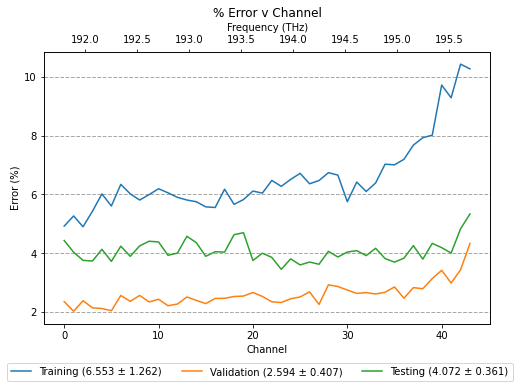

In [4]:
fig1, ax1 = plt.subplots(1, figsize = (8,5))

ax1.plot(np.arange(0,44), res_comb[:,3], label='Training')
ax1.plot(np.arange(0,44), res_comb[:,6], label='Validation')

ax1.plot(np.arange(0,44), test_res[1:,1], label='Testing ({0} \u00B1 {1})'.format(np.mean(test_res[1:,1]), np.std(test_res[1:,1])))

ax2 = ax1.twiny()
ax2.set_xlim([freqs[0], freqs[-1]])
ax2.set_xlabel('Frequency (THz)')
#ax2.plot(np.arange(191.6, 195.9, 0.1), )

ax1.set_xlabel('Channel')
ax1.set_ylabel('Error (%)')
ax1.set_title('% Error v Channel')
#ax1.set_xticks(np.arange(1,11), major=True)
ax1.grid(b=True, which='major', axis='y', color='darkgrey',linestyle='--', linewidth=1.0)


fig1.savefig('{0}.{1}'.format('comb_t_v_pct_err',file_ext))

train_str = 'Training ({0:.3f} \u00B1 {1:.3f})'.format(np.mean(res_comb[:,3]), np.std(res_comb[:,3]))
val_str = 'Validation ({0:.3f} \u00B1 {1:.3f})'.format(np.mean(res_comb[:,6]), np.std(res_comb[:,6]))
tst_str = 'Testing ({0:.3f} \u00B1 {1:.3f})'.format(np.mean(test_res[1:,1]), np.std(test_res[1:,1]))
fig1.legend(labels = (train_str,val_str, tst_str), facecolor='inherit', loc='upper center', bbox_to_anchor=(0.5, 0.03),shadow=False, ncol=3)

plt.show()
fig1.savefig('images/{0}.{1}'.format('percent_error',file_ext))

In [5]:
not_normalised = pd.read_csv(filepath_or_buffer= os.getcwd() + "/training_not_normalised.csv", header=0).to_numpy()[:,1]
normalised = pd.read_csv(filepath_or_buffer= os.getcwd() + "/ch19_training_log_ep750_pct_err5.2_mse0.0.csv", header=0).to_numpy()[:,1]

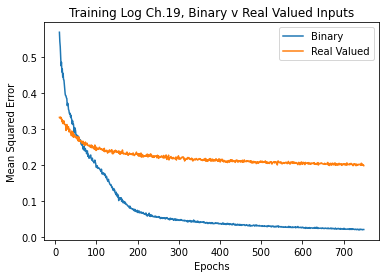

In [12]:
fig2, ax2 = plt.subplots(1)

frm = 10
ax2.plot(np.arange(frm, 750), normalised[frm:], label='Binary')
ax2.plot(np.arange(frm, 750), not_normalised[frm:], label='Read Valued')


ax2.set_xlabel('Epochs')
ax2.set_ylabel('Mean Squared Error')
ax2.set_title('Training Log Ch.19, Binary v Real Valued Inputs')


plt.legend(labels = ('Binary','Real Valued'), facecolor='inherit', loc='upper right')
plt.show()
fig2.savefig('images/{0}.{1}'.format('real_valued_binary',file_ext))